In [1]:
# Import relevant Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading in Dataset (downloaded from kaggle.com/andrewmvd)

dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# View first 5 rows
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Here we begin understanding the data.
# Using the info() method helps quantify null values and potentially unhelpful catagories.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# Using the describe() method gives insight into the data's central tendencies.
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
# Split data into a group for numerical values and another group for categorical (in this case, binary 0 or 1) values.
n_dataset = dataset[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]
c_dataset = dataset[['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']]

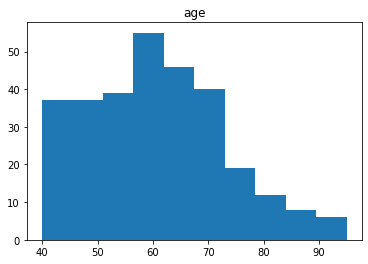

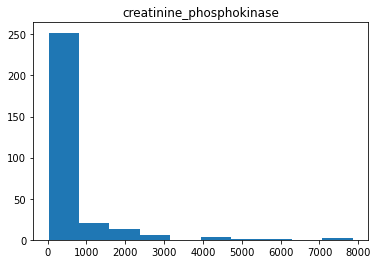

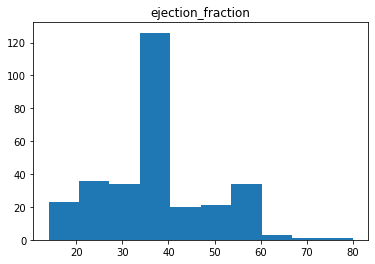

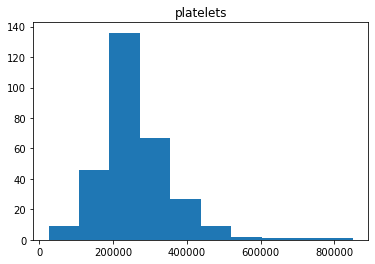

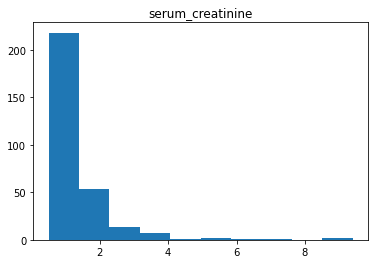

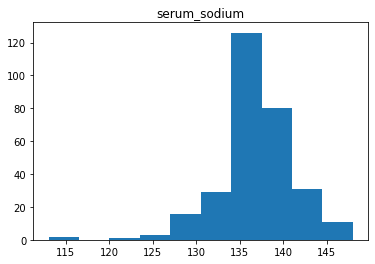

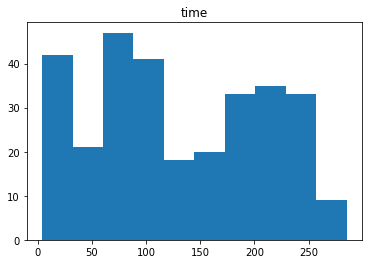

In [6]:
# visualize distributions for the Numerical Value dataset. 
# This helps us determine which distriutions are generally normalized, skewed, have outliers, etc.
for col in n_dataset.columns:
    plt.hist(n_dataset[col])
    plt.title(col)
    plt.show()

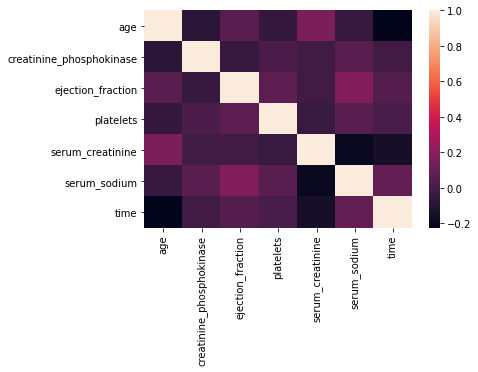

In [7]:
# Quantify correlations between the numerical values to understand their relationships.
# This will help avoid multicolinearity if necessary.
#print(n_dataset.corr())

# Visualize correlations
sns.heatmap(n_dataset.corr())

In [8]:
# Comparing mortality rate for each numerical column
pd.pivot_table(dataset, index = 'DEATH_EVENT', values = n_dataset.columns)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
DEATH_EVENT,,,,,,,
0,58.761906,540.054187,40.26601,266657.489901,1.184877,137.216749,158.339901
1,65.215281,670.197917,33.46875,256381.044792,1.835833,135.375000,70.885417


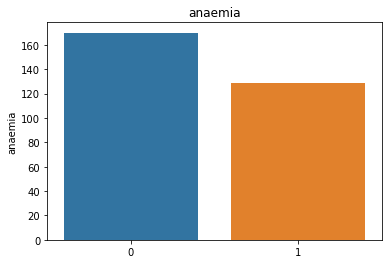

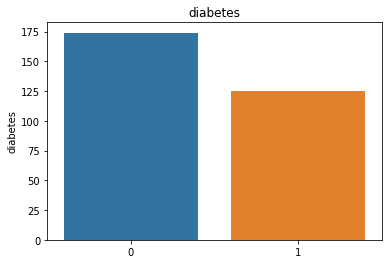

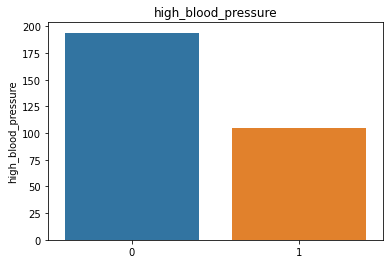

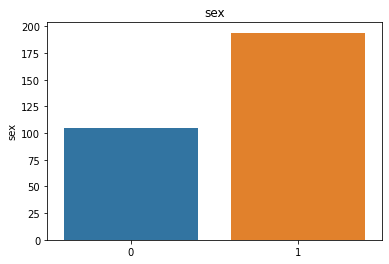

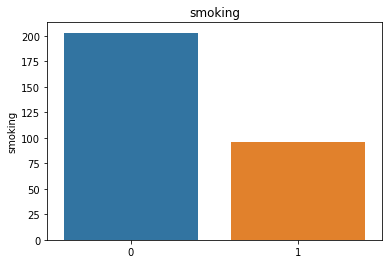

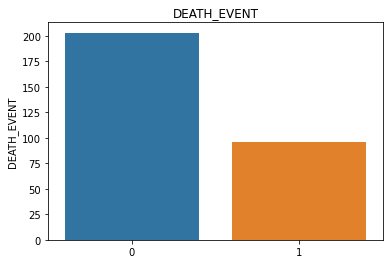

In [9]:
# Now visualize binary distributions for the Categorical Value dataset. 

for col in c_dataset.columns:
    sns.barplot(c_dataset[col].value_counts().index, c_dataset[col].value_counts()).set_title(col)
    plt.show()

In [10]:
# Now compare mortality rate for each categorical column
for col in c_dataset:
    if col != 'DEATH_EVENT':
        print(pd.pivot_table(dataset, index = 'DEATH_EVENT', columns = col, values = 'age',aggfunc = 'count'))
        print()

anaemia        0   1
DEATH_EVENT         
0            120  83
1             50  46

diabetes       0   1
DEATH_EVENT         
0            118  85
1             56  40

high_blood_pressure    0   1
DEATH_EVENT                 
0                    137  66
1                     57  39

sex           0    1
DEATH_EVENT         
0            71  132
1            34   62

smoking        0   1
DEATH_EVENT         
0            137  66
1             66  30



In [11]:
# importing libraries for Standard scaling and splitting the data into train and test sets
# Using Standardization and splitting the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
#dataset.describe()

In [12]:
# With the chosen features, define the final dataset that will be split and used in the model
df_model = dataset[['DEATH_EVENT','age','anaemia','ejection_fraction','high_blood_pressure','time','serum_creatinine',]]
X = df_model.drop('DEATH_EVENT', axis = 1)
y = df_model.DEATH_EVENT.values

In [13]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)


In [14]:
# Using Standardization
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
# First fit Logistic Regression model and show performance metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

# Creating a list to save each performance score for each model added
acc_list = []
rec_list = []
pre_list = []
f1_list = []
# Full lists will each contain [LogRegression, kNearestNeighbors, gNaiveBayes, Randomforest, DecisonTree, SVM]

In [16]:
# Calculating confusion matrix for better sense of the model's performance
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Define a function that prints each element in a given confusion matrix
def print_cm(cm):
    print("True Negatives: "+str(cm[0,0]))
    print("True Positives: "+str(cm[1,1]))
    print("False Negatives: "+str(cm[1,0]))
    print("False Positives: "+str(cm[0,1]))

predictions = logreg.predict(X_test)

In [17]:
# determine and collect scores of Logistic Regression model
acc = accuracy_score(y_test,predictions)
rec = recall_score(y_test,predictions)
pre = precision_score(y_test,predictions)
f1 = f1_score(y_test,predictions)

print_cm(confusion_matrix(y_test, predictions))

acc_list.append(acc)
rec_list.append(rec)
pre_list.append(pre)
f1_list.append(f1)

True Negatives: 36
True Positives: 11
False Negatives: 12
False Positives: 1


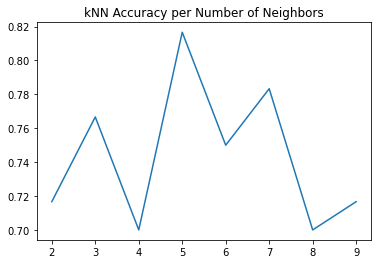

In [18]:
# Now build a K Nearest Neighbors model
# First loop to find the number of neighbors that returns the highest accuracy
from sklearn.neighbors import KNeighborsClassifier

n_list = []
for n in range(2,10):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    n_list.append(accuracy_score(y_test,predictions))
plt.plot(list(range(2,10)), n_list)
plt.title("kNN Accuracy per Number of Neighbors")
plt.show()

In [19]:
# Since 5 neighbors yields the highest accuracy, use n = 5 in the model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)


In [20]:
# KNN confusion matrix 

acc = accuracy_score(y_test,predictions)
rec = recall_score(y_test,predictions)
pre = precision_score(y_test,predictions)
f1 = f1_score(y_test,predictions)

print("Accuracy Score: " +str(acc))
print_cm(confusion_matrix(y_test, predictions))

acc_list.append(acc)
rec_list.append(rec)
pre_list.append(pre)
f1_list.append(f1)

Accuracy Score: 0.8166666666666667
True Negatives: 36
True Positives: 13
False Negatives: 10
False Positives: 1


In [21]:
# Naïve Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictions = gnb.predict(X_test)

In [22]:
# determine and collect scores of Gaussian Naïve Bayes model
acc = accuracy_score(y_test,predictions)
rec = recall_score(y_test,predictions)
pre = precision_score(y_test,predictions)
f1 = f1_score(y_test,predictions)

print("Accuracy Score: " +str(acc))
print_cm(confusion_matrix(y_test, predictions))

acc_list.append(acc)
rec_list.append(rec)
pre_list.append(pre)
f1_list.append(f1)

Accuracy Score: 0.7666666666666667
True Negatives: 34
True Positives: 12
False Negatives: 11
False Positives: 3


In [23]:
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

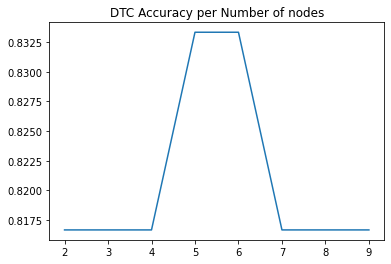

In [24]:
# Find best number of nodes

n_list = []
for n in range(2,10):
    dtc = DecisionTreeClassifier(max_leaf_nodes = n, random_state=0, criterion='entropy')
    dtc.fit(X_train, y_train)
    predictions = dtc.predict(X_test)
    n_list.append(accuracy_score(y_test,predictions))

plt.title("DTC Accuracy per Number of nodes")
plt.plot(list(range(2,10)), n_list)
plt.show()
# Based on the plot, n=5 and n=6 yield the highest accuracy

In [25]:
# Build Decision Tree Classifier
dtc = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0, criterion='entropy')
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)

In [26]:
# Determine and collect scores of Decision Tree model

acc = accuracy_score(y_test,predictions)
rec = recall_score(y_test,predictions)
pre = precision_score(y_test,predictions)
f1 = f1_score(y_test,predictions)

print("Accuracy Score: " +str(acc))
print_cm(confusion_matrix(y_test, predictions))

acc_list.append(acc)
rec_list.append(rec)
pre_list.append(pre)
f1_list.append(f1)

Accuracy Score: 0.8333333333333334
True Negatives: 34
True Positives: 16
False Negatives: 7
False Positives: 3


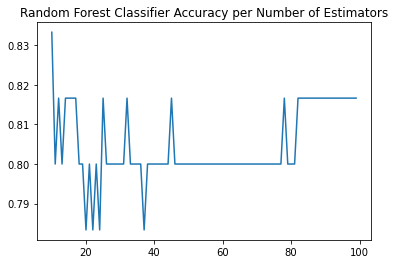

In [27]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Find best number of estimators
n_list = []
for n in range(10,100):
    rfc = RandomForestClassifier(n_estimators = n, random_state=0)
    rfc.fit(X_train, y_train)
    predictions = rfc.predict(X_test)
    n_list.append(accuracy_score(y_test,predictions))
#print(mylist)
plt.plot(list(range(10,100)), n_list)
plt.title("Random Forest Classifier Accuracy per Number of Estimators")
plt.show()
# Based on the plot, n=10 yields the highest accuracy

In [28]:
# Build Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators = 10, random_state=0)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [29]:
# Determine and collect score of Random Forest model

acc = accuracy_score(y_test,predictions)
rec = recall_score(y_test,predictions)
pre = precision_score(y_test,predictions)
f1 = f1_score(y_test,predictions)

print("Accuracy Score: " +str(acc))
print_cm(confusion_matrix(y_test, predictions))

acc_list.append(acc)
rec_list.append(rec)
pre_list.append(pre)
f1_list.append(f1)

Accuracy Score: 0.8333333333333334
True Negatives: 35
True Positives: 15
False Negatives: 8
False Positives: 2


In [30]:
# Support Vector Machine
from sklearn.svm import SVC
svmodel = SVC(random_state=0, kernel = 'rbf')
svmodel.fit(X_train, y_train)
predictions = svmodel.predict(X_test)

In [31]:
# Determine and collect scores of Decision Tree model

acc = accuracy_score(y_test,predictions)
rec = recall_score(y_test,predictions)
pre = precision_score(y_test,predictions)
f1 = f1_score(y_test,predictions)

print("Accuracy Score: " +str(acc))
print_cm(confusion_matrix(y_test, predictions))

acc_list.append(acc)
rec_list.append(rec)
pre_list.append(pre)
f1_list.append(f1)

Accuracy Score: 0.7833333333333333
True Negatives: 36
True Positives: 11
False Negatives: 12
False Positives: 1


In [32]:
# Results

# List of Classifier Models used 
models = ['Logistic Regression','K-NearestNeighbor','Naive Bayes','Decision Tree','Random Forest', 'Support Vector Machine']
# List of metrics used
mets = ['Accuracy', 'Recall','Precision','F1-Score']
colors = ['red','purple','blue','black']

# combine into a python Dict
d = {'Model':models, mets[0]:acc_list, mets[1]:rec_list, mets[2]:pre_list, mets[3]:f1_list}

# create a pandas dataframe from Dict
stat_df = pd.DataFrame(data=d)
stat_df

,Model,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,0.783333,0.478261,0.916667,0.628571
1,K-NearestNeighbor,0.816667,0.565217,0.928571,0.702703
2,Naive Bayes,0.766667,0.521739,0.800000,0.631579
3,Decision Tree,0.833333,0.695652,0.842105,0.761905
4,Random Forest,0.833333,0.652174,0.882353,0.750000
5,Support Vector Machine,0.783333,0.478261,0.916667,0.628571


In [33]:
# rearrange the dataframe for easier plotting
stat_df = pd.melt(stat_df, id_vars="Model", var_name="Metric", value_name="Score")
stat_df

,Model,Metric,Score
0,Logistic Regression,Accuracy,0.783333
1,K-NearestNeighbor,Accuracy,0.816667
2,Naive Bayes,Accuracy,0.766667
3,Decision Tree,Accuracy,0.833333
4,Random Forest,Accuracy,0.833333
5,Support Vector Machine,Accuracy,0.783333
6,Logistic Regression,Recall,0.478261
7,K-NearestNeighbor,Recall,0.565217
8,Naive Bayes,Recall,0.521739
9,Decision Tree,Recall,0.695652


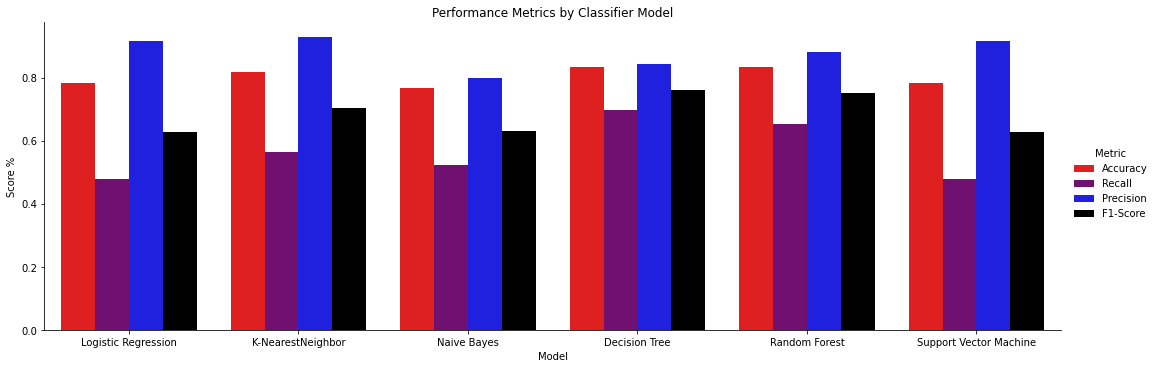

In [34]:
# Contruct bar plot to visualize each classifier's performance
sns.catplot(x='Model', y='Score', hue='Metric', data=stat_df, kind='bar',palette=colors,height=5,aspect=3)
plt.title("Performance Metrics by Classifier Model")
plt.ylabel("Score %")
plt.xlabel("Model")
plt.show()

In [35]:
# K-Nearest Neighbor has the highest Precision, but Recall and F1 have higher importance for this task.
# Decision Tree and Random Forest tied for highest Accuracy (83%), but Decision Tree has a better Recall and F1 Score.